<a href="https://colab.research.google.com/github/usaftennis/ExtapolationFramework/blob/main/Image_extrapolation_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## imports and setup


In [ ]:
# for numeric operations
import numpy as np
# for visulation
import matplotlib.pyplot as plt
# for image handling
from PIL import Image

# to handle tensors 
import tensorflow as tf
# to load the model from hub
import tensorflow_hub as hub

# to handle web address for images
from six.moves.urllib.request import urlopen

In [ ]:
def image_read(filename):
  file = None
  if (filename.startswith('http')):
    file = urlopen(filename)
  else:
    file = tf.io.gfile.GFile(filename, 'rb')

  pil_image = Image.open(file)
  width, height = pil_image.size

  pil_image = pil_image.crop((0,0, width, height))
  pil_image = pil_image.resize((257,257),Image.ANTIALIAS)
  unscaled_image = np.array(pil_image)
  image_np = np.expand_dims(unscaled_image.astype(np.float32)/255.,axis=0)
  return image_np

## Visulisation method

In [ ]:
def comparison(img_orignal, img_masked, img_filled):
  plt.figure(figsize=(24,12))
  
  plt.subplot(131)
  plt.imshow((np.squeeze(img_orignal)))
  plt.title('Orignal',fontsize=20)
  plt.axis('off')
  
  plt.subplot(132)
  plt.imshow((np.squeeze(img_masked)))
  plt.title('masked',fontsize=20)
  plt.axis('off')
  
  plt.subplot(133)
  plt.imshow((np.squeeze(img_filled)))
  plt.title('Generated',fontsize = 20)
  plt.axis('off')
  plt.show()

## load image

In [ ]:
#image_path = 'https://media.gettyimages.com/photos/pune-railway-station-india-picture-id1186355743?s=612x612'

#image_path = "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSCZlf5lc5tX-0gY-y94pGS0mQdL-D0lCH2OQ&usqp=CAU"

#image_path = "https://orthostudio.ca/wp-content/uploads/2016/11/image-3.jpg"

image_path = "https://upload.wikimedia.org/wikipedia/commons/thumb/9/9d/Aegina_sunset.jpg/640px-Aegina_sunset.jpg"

image = image_read(image_path)

(-0.5, 256.5, 256.5, -0.5)

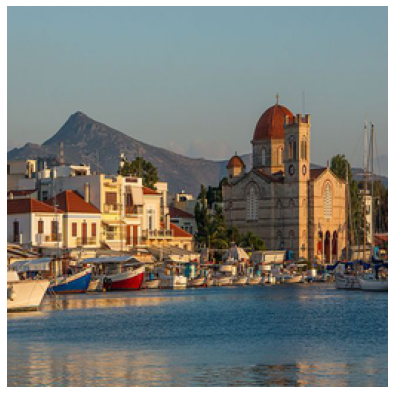

In [ ]:
plt.figure(figsize=(7,7))
plt.imshow(image_read(image_path)[0])
plt.axis('off')

## select model from tensorflow hub

In [ ]:
model_name = 'Boundless Quarter'
model_map = {'Boundless Half' : 'https://tfhub.dev/google/boundless/half/1',
    'Boundless Quarter' : 'https://tfhub.dev/google/boundless/quarter/1', 
    'Boundless Three Quarters' : 'https://tfhub.dev/google/boundless/three_quarter/1'}

model_handle = model_map[model_name]

print('Loading model {} ({})'.format(model_name,model_handle))
model = hub.load(model_handle)

Loading model Boundless Quarter (https://tfhub.dev/google/boundless/quarter/1)


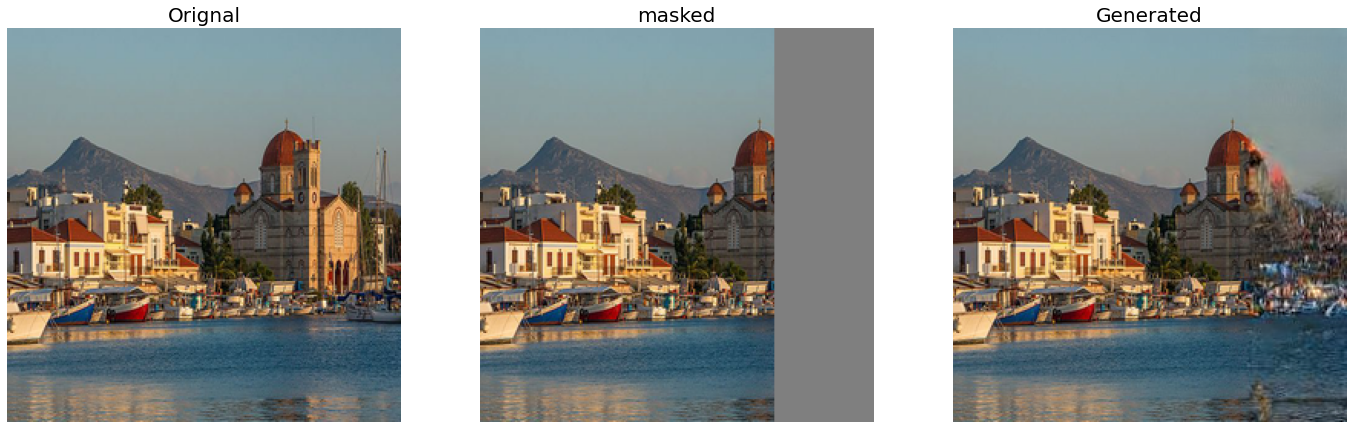

In [ ]:
result = model.signatures['default'](tf.constant((image)))
generated_img = result['default']
masked_img = result['masked_image']

comparison(image_read(image_path),masked_img,generated_img)